In [118]:
import gym
import gym_anytrading
from stable_baselines3 import A2C, PPO
from stable_baselines3.common.vec_env import DummyVecEnv

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [119]:
import yfinance as yf
df = yf.download('AMZN', period='6mo', interval='1h')

[*********************100%***********************]  1 of 1 completed


In [120]:
df.dtypes

Price      Ticker
Adj Close  AMZN      float64
Close      AMZN      float64
High       AMZN      float64
Low        AMZN      float64
Open       AMZN      float64
Volume     AMZN        int64
dtype: object

In [121]:
df['Volume'] = df['Volume'].astype('float64')


In [122]:
df.describe()


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
count,888.000000,888.000000,888.000000,888.000000,888.000000,8.880000e+02
mean,191.859793,191.859793,192.565935,191.082900,191.864264,4.600616e+06
std,16.189560,16.189560,16.200273,16.191256,16.164877,3.660155e+06
min,158.184998,158.184998,161.279999,154.600006,155.816803,1.306321e+06
25%,182.136250,182.136250,182.741245,181.438499,182.119995,2.601726e+06
50%,188.160454,188.160454,188.910004,187.450005,188.294998,3.441066e+06
75%,199.842503,199.842503,200.161598,199.051250,199.842503,5.350867e+06
max,232.940002,232.940002,233.000000,232.199997,232.869995,5.029881e+07


<Axes: xlabel='Datetime'>

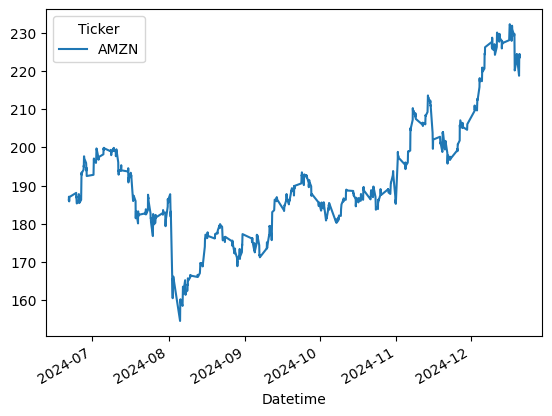

In [123]:
df.plot(y='Low', use_index=True)


In [124]:
# Create the environment
from gym_anytrading.envs import StocksEnv

In [125]:
df

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
Datetime,,,,,,
2024-06-21 13:30:00+00:00,187.258194,187.258194,188.199997,186.320007,187.740005,20170715.0
2024-06-21 14:30:00+00:00,187.293396,187.293396,187.740005,186.509995,187.240005,3507532.0
2024-06-21 15:30:00+00:00,188.039993,188.039993,188.302399,187.089996,187.270004,4384449.0
2024-06-21 16:30:00+00:00,186.619995,186.619995,188.059998,186.445007,188.059998,2924279.0
2024-06-21 17:30:00+00:00,186.856598,186.856598,186.870193,185.869995,186.610001,3382552.0
...,...,...,...,...,...,...
2024-12-20 16:30:00+00:00,226.125000,226.125000,226.210007,224.289993,224.339996,3699354.0
2024-12-20 17:30:00+00:00,224.140106,224.140106,226.140106,223.679993,226.139999,2867024.0


Data length: 888
Start index: 16
End index: 887
info {'total_reward': 22.707809448242188, 'total_profit': 0.043710339316873244, 'position': <Positions.Long: 1>}


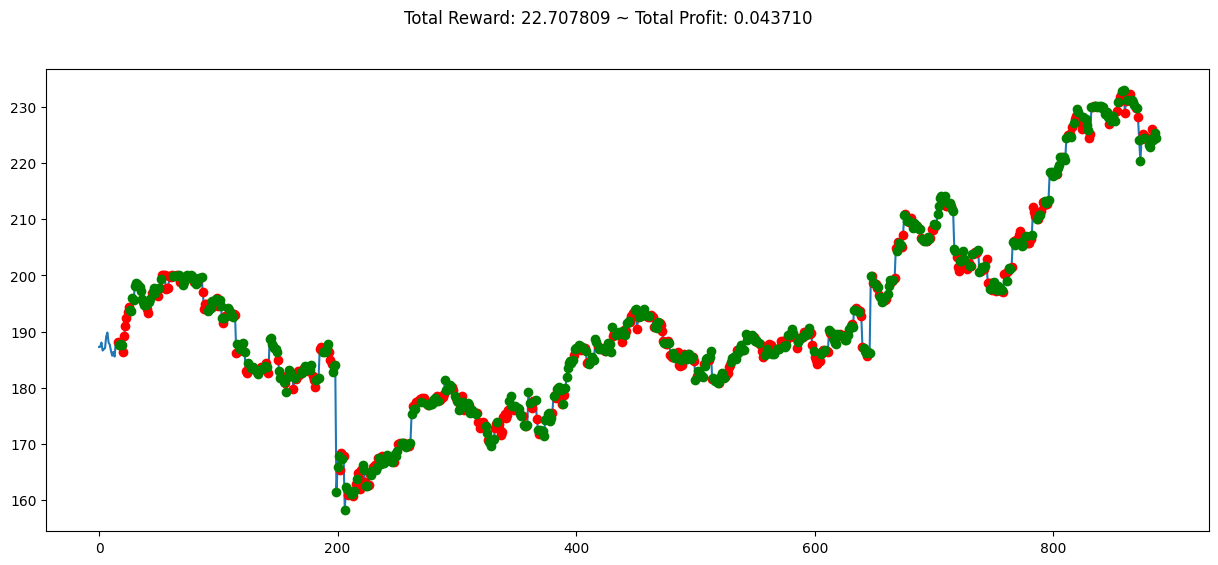

In [126]:
# First, restructure the DataFrame while keeping the index
# df = pd.DataFrame({
#     'Open': df['Open'],
#     'High': df['High'],
#     'Low': df['Low'],
#     'Close': df['Close']
# }, index=df.index) 
# First, restructure the DataFrame while keeping the index
df = pd.DataFrame({
    'Open': df['Open']['AMZN'],
    'High': df['High']['AMZN'],
    'Low': df['Low']['AMZN'],
    'Close': df['Close']['AMZN']
}, index=df.index)  # Keep the original index

# Make sure there are no NaN values
df = df.dropna()

# Set up the environment parameters
window_size = 16
start_index = window_size
end_index = len(df) - 1  # Use the full length of available data

print(f"Data length: {len(df)}")
print(f"Start index: {start_index}")
print(f"End index: {end_index}")



info {'total_reward': 4.1366729736328125, 'total_profit': 0.12460952399816065, 'position': <Positions.Long: 1>}


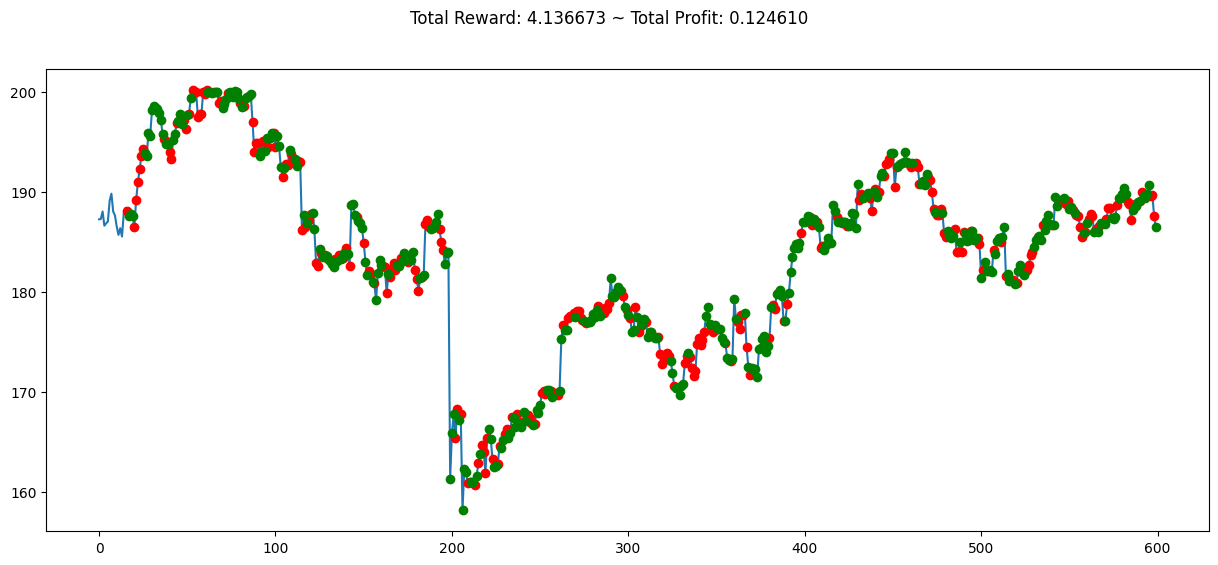

In [180]:
# Create the environment
env = StocksEnv(
    df=df,
    frame_bound=(start_index, 600),
    window_size=window_size
)

# ... existing DataFrame setup and environment creation ...

state = env.reset()
while True: 
    action = env.action_space.sample()
    # Update to handle 5 return values
    n_state, reward, terminated, truncated, info = env.step(action)
    # Check for either terminated or truncated
    done = terminated or truncated
    if done: 
        print("info", info)
        break
        
# ... rest of the code remains the same ...
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [19]:
import torch
import torch.nn as nn
from stable_baselines3.common.torch_layers import BaseFeaturesExtractor
from stable_baselines3.common.policies import ActorCriticPolicy
# %%
class CNNLSTMFeaturesExtractor(BaseFeaturesExtractor):
    """
    Custom feature extractor that applies 1D CNN followed by LSTM on the input observations.
    """
    def __init__(self, observation_space: gym.spaces.Box, features_dim: int = 256):
        # Calculate the input dimensions
        super(CNNLSTMFeaturesExtractor, self).__init__(observation_space, features_dim)
        
        self.conv = nn.Sequential(
            nn.Conv1d(in_channels=observation_space.shape[1], out_channels=32, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2),
            nn.Conv1d(in_channels=32, out_channels=64, kernel_size=3, stride=1),
            nn.ReLU(),
            nn.MaxPool1d(kernel_size=2)
        )
        
        # After Conv and Pool layers, calculate the output size
        # Assuming window_size=5 and features=19, adjust if different
        # Conv1d output size formula: L_out = (L_in + 2*padding - dilation*(kernel_size-1) -1)/stride +1
        # Here, padding=0, dilation=1, stride as defined
        # For window_size=5:
        # After first Conv1d: (5 - 3)/1 + 1 = 3
        # After first MaxPool1d: floor(3/2) = 1
        # After second Conv1d: (1 - 3)/1 + 1 = -1 (which is invalid)
        # To prevent negative size, adjust window_size or padding
        # Here, we set window_size=8 for example purposes
        # Adjust window_size accordingly in environment
        
        input_length = observation_space.shape[0]
        self.lstm_input_size = 64  # As per conv layers' out_channels
        self.hidden_size = 128
        
        self.lstm = nn.LSTM(input_size=self.lstm_input_size, hidden_size=self.hidden_size, batch_first=True)
        
        # Output from LSTM will be passed to a linear layer
        self.linear = nn.Sequential(
            nn.Linear(self.hidden_size, features_dim),
            nn.ReLU()
        )
        
    def forward(self, observations: torch.Tensor) -> torch.Tensor:
        # observations shape: (batch_size, window_size, features)
        # Permute to (batch_size, features, window_size) for Conv1d
        x = observations.permute(0, 2, 1)
        x = self.conv(x)
        
        # Permute back to (batch_size, sequence_length, features)
        x = x.permute(0, 2, 1)
        
        # LSTM expects input of shape (batch, seq, feature)
        lstm_out, _ = self.lstm(x)
        
        # Use the last output of LSTM
        lstm_out = lstm_out[:, -1, :]
        
        x = self.linear(lstm_out)
        return x

class CustomCNNLSTMPPOPolicy(ActorCriticPolicy):
    """
    Custom Actor-Critic Policy with CNN + LSTM feature extractor.
    """
    def __init__(self, *args, **kwargs):
        super(CustomCNNLSTMPPOPolicy, self).__init__(
            *args, 
            **kwargs,
            features_extractor_class=CNNLSTMFeaturesExtractor,
            features_extractor_kwargs=dict(features_dim=256)
        )
        # Override the activation function for the policy and value networks if needed
        self.mlp_extractor.policy_net = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU()
        )
        self.mlp_extractor.value_net = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU()
        )


In [57]:
env_maker = lambda: StocksEnv(df=df, frame_bound=(start_index, end_index), window_size=window_size)
env = DummyVecEnv([env_maker])

model = PPO(CustomCNNLSTMPPOPolicy, env, verbose=1)
model.learn(total_timesteps=100000)

Using cpu device
-----------------------------
| time/              |      |
|    fps             | 195  |
|    iterations      | 1    |
|    time_elapsed    | 10   |
|    total_timesteps | 2048 |
-----------------------------
------------------------------------------
| time/                   |              |
|    fps                  | 95           |
|    iterations           | 2            |
|    time_elapsed         | 42           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0006497975 |
|    clip_fraction        | 0            |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.693       |
|    explained_variance   | 3.92e-05     |
|    learning_rate        | 0.0003       |
|    loss                 | 3.2          |
|    n_updates            | 10           |
|    policy_gradient_loss | -0.000211    |
|    value_loss           | 11.5         |
------------------------------------------

info {'total_reward': 0.0, 'total_profit': 0.9793248164067544, 'position': <Positions.Long: 1>}


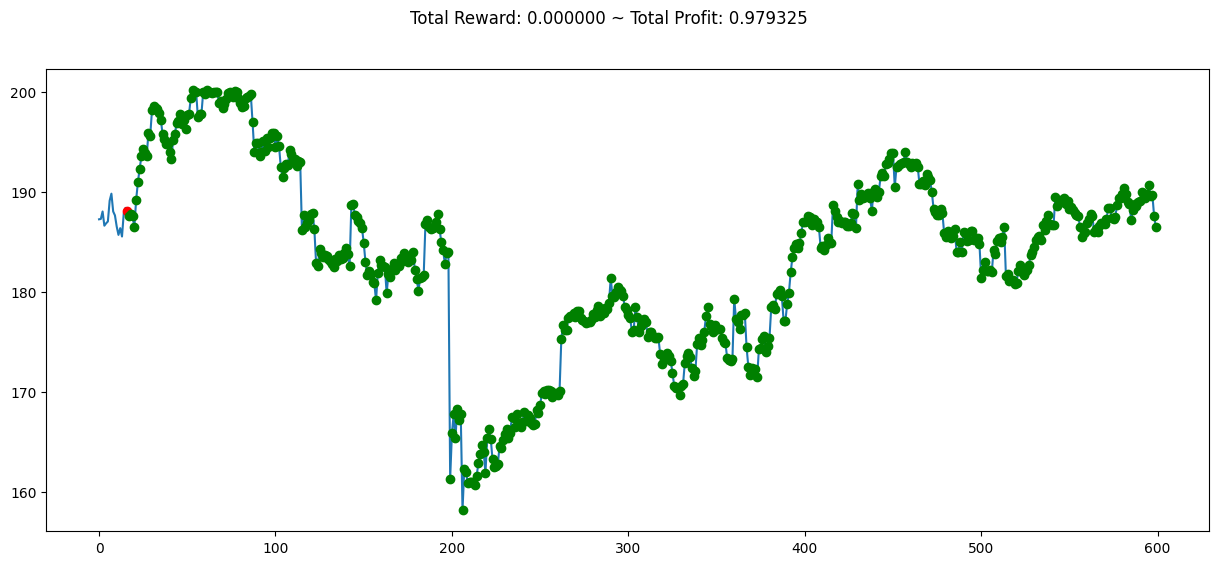

In [185]:
env = StocksEnv(df=df, frame_bound=(start_index, 600), window_size=window_size)

obs = env.reset()
if isinstance(obs, tuple):  # Handle new gym API
    obs = obs[0]

while True: 
    if obs.ndim == 2:
        obs = obs[np.newaxis, :]  # Add batch dimension if needed
    
    action, _states = model.predict(obs, deterministic=True)
    obs, rewards, terminated, truncated, info = env.step(action)  # New gym API
    done = terminated or truncated
    
    if done:
        print("info", info)
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()